In [20]:
import komm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Vetor de bit
bit_vector = np.random.randint(0, 2, 100000)
bit_vector[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [22]:
# Define SNR Range
snr_range = np.arange(0, 25, 1)

In [23]:
from scipy.stats import rayleigh

# BER Calculation with Rayleigh Fading (SISO)
ber_siso_rayleigh = []
for snr in snr_range:
    noise_power = 1 / (10**(snr / 10))
    rayleigh_fading = rayleigh.rvs(size=len(bit_vector))
    received_signal = bit_vector * rayleigh_fading + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    demodulated_bits = np.where(received_signal > 0.5, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_siso_rayleigh.append(ber)

# BER Calculation with Rayleigh Fading (MRC 1x2)
ber_mrc_1x2_rayleigh = []
for snr in snr_range:
    rayleigh_channel = komm.RayleighFadingChannel(snr=10**(snr/10), signal_power=1)
    received_signal_1 = rayleigh_channel(bit_vector)
    received_signal_2 = rayleigh_channel(bit_vector)
    combined_signal = received_signal_1 + received_signal_2
    demodulated_bits = np.where(combined_signal > 1.0, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_mrc_1x2_rayleigh.append(ber)

In [24]:
from scipy.stats import rayleigh

# BER Calculation with Rayleigh Fading (MRC 1x2)
ber_mrc_1x2_rayleigh = []

for snr in snr_range:
    noise_power = 1 / (10**(snr / 10))
    rayleigh_fading_1 = rayleigh.rvs(size=len(bit_vector))
    rayleigh_fading_2 = rayleigh.rvs(size=len(bit_vector))
    received_signal_1 = bit_vector * rayleigh_fading_1 + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    received_signal_2 = bit_vector * rayleigh_fading_2 + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    combined_signal = received_signal_1 + received_signal_2
    demodulated_bits = np.where(combined_signal > 1.0, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_mrc_1x2_rayleigh.append(ber)

# BER Calculation with Rayleigh Fading (MRC 1x4)
ber_mrc_1x4_rayleigh = []
for snr in snr_range:
    rayleigh_channel = komm.RayleighFadingChannel(snr=10**(snr/10), signal_power=1)
    received_signal_1 = rayleigh_channel(bit_vector)
    received_signal_2 = rayleigh_channel(bit_vector)
    received_signal_3 = rayleigh_channel(bit_vector)
    received_signal_4 = rayleigh_channel(bit_vector)
    combined_signal = received_signal_1 + received_signal_2 + received_signal_3 + received_signal_4
    demodulated_bits = np.where(combined_signal > 2.0, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_mrc_1x4_rayleigh.append(ber)

In [25]:
from scipy.stats import rayleigh

# BER Calculation with Rayleigh Fading (MRC 1x4)
ber_mrc_1x4_rayleigh = []

for snr in snr_range:
    noise_power = 1 / (10**(snr / 10))
    rayleigh_fading_1 = rayleigh.rvs(size=len(bit_vector))
    rayleigh_fading_2 = rayleigh.rvs(size=len(bit_vector))
    rayleigh_fading_3 = rayleigh.rvs(size=len(bit_vector))
    rayleigh_fading_4 = rayleigh.rvs(size=len(bit_vector))
    received_signal_1 = bit_vector * rayleigh_fading_1 + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    received_signal_2 = bit_vector * rayleigh_fading_2 + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    received_signal_3 = bit_vector * rayleigh_fading_3 + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    received_signal_4 = bit_vector * rayleigh_fading_4 + np.sqrt(noise_power) * np.random.randn(len(bit_vector))
    combined_signal = received_signal_1 + received_signal_2 + received_signal_3 + received_signal_4
    demodulated_bits = np.where(combined_signal > 2.0, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_mrc_1x4_rayleigh.append(ber)

# BER Calculation with Pure AWGN Noise
ber_awgn = []
for snr in snr_range:
    awgn_channel = komm.AWGNChannel(snr=10**(snr/10), signal_power=1)
    received_signal = awgn_channel(bit_vector)
    demodulated_bits = np.where(received_signal > 0.5, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_awgn.append(ber)

In [26]:
# BER Calculation with Pure AWGN Noise
ber_awgn = []

for snr in snr_range:
    awgn_channel = komm.AWGNChannel(snr=10**(snr/10), signal_power=1)
    received_signal = awgn_channel(bit_vector)
    demodulated_bits = np.where(received_signal > 0.5, 1, 0)
    ber = np.mean(bit_vector != demodulated_bits)
    ber_awgn.append(ber)

# Plot BER vs SNR
plt.figure(figsize=(20, 12))
plt.semilogy(snr_range, ber_siso_rayleigh, marker='o', label='SISO Rayleigh')
plt.semilogy(snr_range, ber_mrc_1x2_rayleigh, marker='o', label='MRC 1x2 Rayleigh')
plt.semilogy(snr_range, ber_mrc_1x4_rayleigh, marker='o', label='MRC 1x4 Rayleigh')
plt.semilogy(snr_range, ber_awgn, marker='o', label='AWGN')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER vs SNR for Different Transmission Methods')
plt.legend()
plt.grid(True)
plt.show()

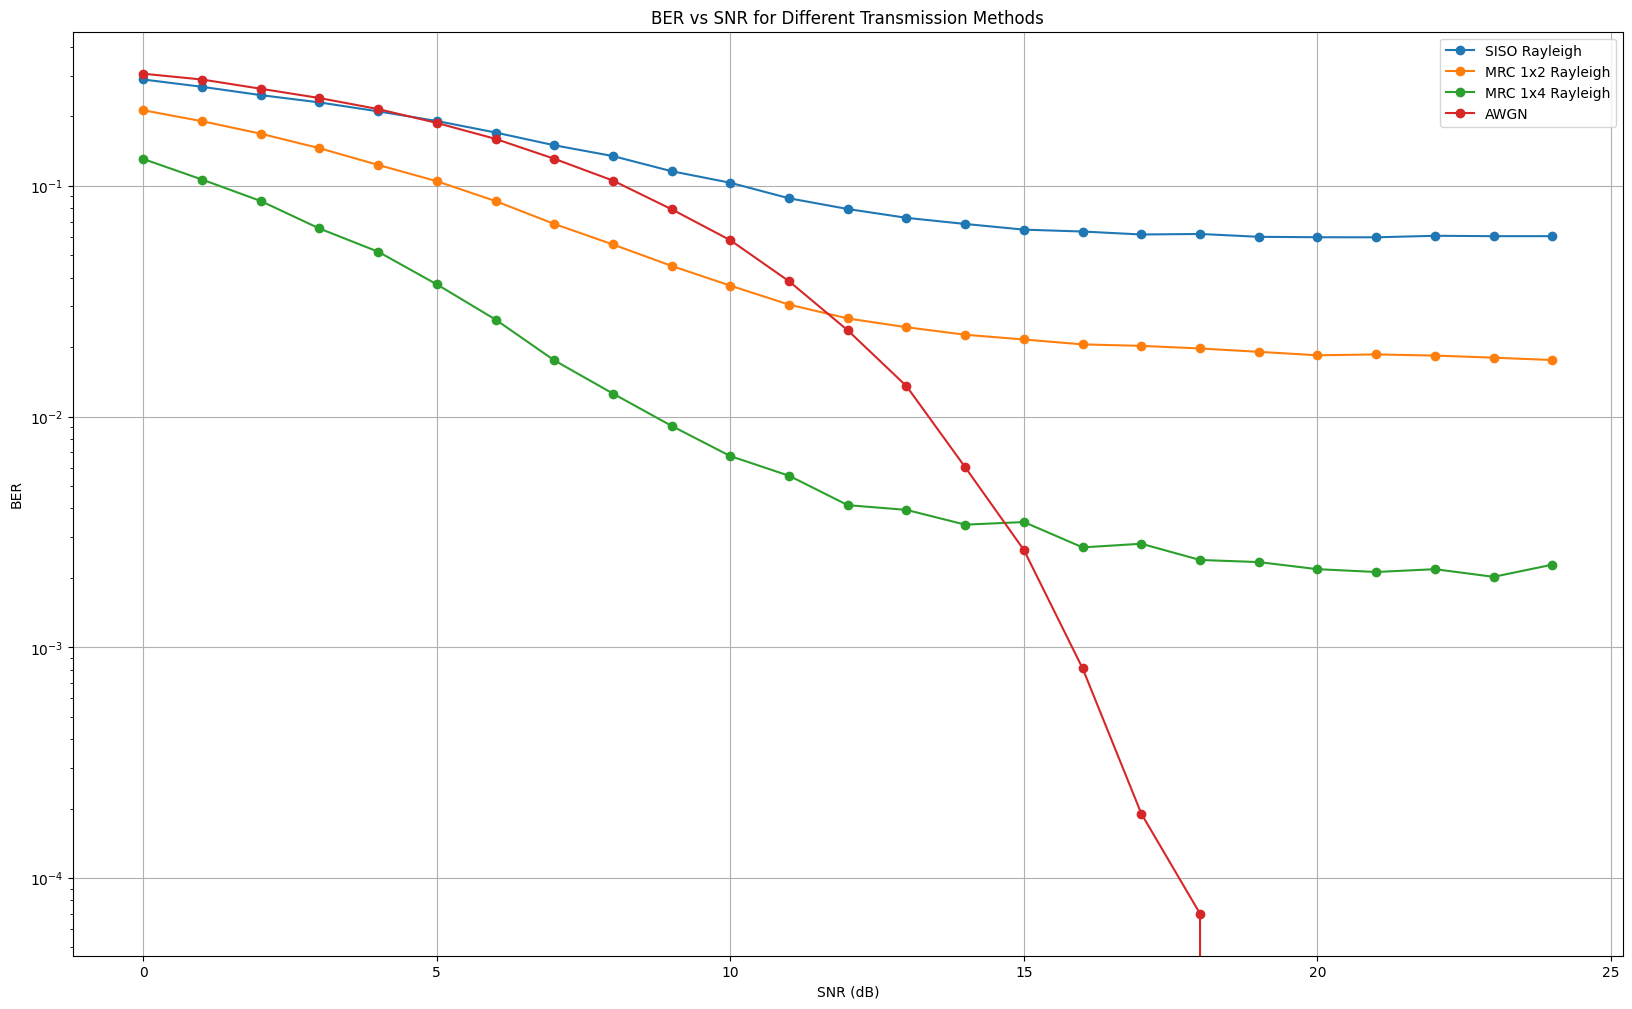

In [27]:
plt.figure(figsize=(20, 12))
plt.semilogy(snr_range, ber_siso_rayleigh, marker='o', label='SISO Rayleigh')
plt.semilogy(snr_range, ber_mrc_1x2_rayleigh, marker='o', label='MRC 1x2 Rayleigh')
plt.semilogy(snr_range, ber_mrc_1x4_rayleigh, marker='o', label='MRC 1x4 Rayleigh')
plt.semilogy(snr_range, ber_awgn, marker='o', label='AWGN')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER vs SNR for Different Transmission Methods')
plt.legend()
plt.grid(True)
plt.show()